In [1]:
# import and set parameters
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
sys.path.append('../')
from src.util.load_parser import load_parser
from src.util.load_yaml_config import load_yaml_config
from src.util.seed_torch import seed_torch

/Users/kosuke.sumiyasu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
os.chdir('../')
!ls
CONFIG_PATH = './config/config_file_path.yaml'

README.md          evaluate_curve.py  notebook           requirements.txt
config             evaluate_curve.sh  online_identify.py result
data               models             online_identify.sh src


# Comparison of effectiveness using the insertion/deletion curve.

In [3]:
# initialize
args = load_parser()
seed_torch(args.seed)
args.config_path = CONFIG_PATH
config = load_yaml_config(args.config_path)
args.load_image_dir = config["LOAD_IMAGE_DIR"]  
args.save_result_dir = config["SAVE_RESULT_DIR"]
args.label_to_id_path = config['LABEL_TO_ID_PATH']
args.dataset_sampling_number = 100
args.load_image_dir = os.path.join(args.load_image_dir, args.prefix)

In [4]:
# set the plot config
def plot_config(identify_method):
    if identify_method == 'self-shapley':
        label = 'shapley'
        color = 'red'
        marker = 'x'
    elif identify_method == 'MoXI':
        label = 'MoXI'
        color = 'blue'
        marker = 'o'
    elif identify_method == 'gradcam':
        label = 'Grad-CAM'
        color = 'green'
        marker = 's'
    elif identify_method == 'gradcam++':
        label = 'Grad-CAM++'
        color = 'orange'
        marker = 'v'
    elif identify_method == 'attention_rollout':
        label = 'AR'
        color = 'olive'
        marker = 'v'
    elif identify_method == 'full-shapley':
        label = 'full shapley'
        color = 'purple'
        marker = 'P'
    return label, color, marker


## Plot the Insertion Curve

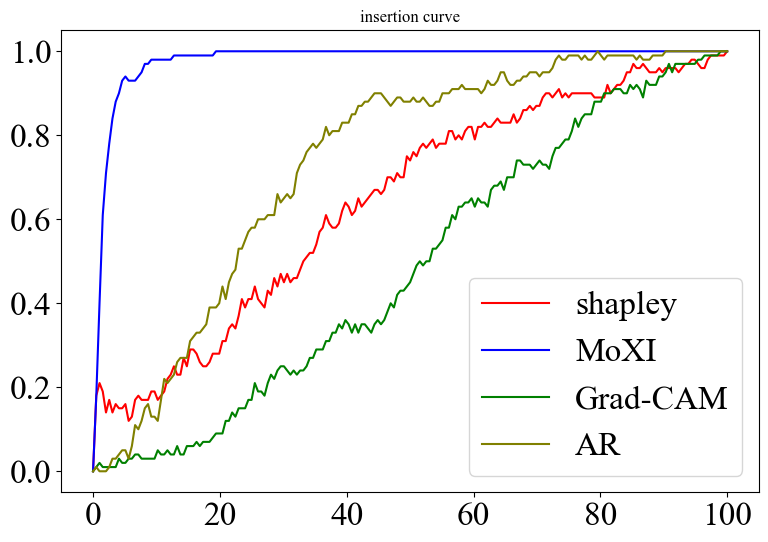

In [9]:
# set the plot config
curve_method = 'insertion'
identify_method_list = ['self-shapley', 'MoXI', 'gradcam', 'attention_rollout']

# plot the result
fig = plt.figure(figsize=(9, 6))
FONT = 24
x_axis = np.linspace(0, 100, args.grid_num**2+1)
plt.rcParams['font.family'] = 'Times New Roman'
for identify_method in identify_method_list:
    path = os.path.join(args.save_result_dir, f'online_identify/{args.dataset}_{args.dataset_sampling_number}/{args.model_name}/{curve_method}/{identify_method}/insertion_accuracy.npy')
    accuracy = np.load(path, allow_pickle=True)
    accuracy = np.insert(accuracy, 0, 0)
    label, color, marker = plot_config(identify_method)
    plt.plot(x_axis, accuracy, label=label, color=color)
plt.title(f'{curve_method} curve')
plt.xticks(fontsize=FONT)
plt.yticks(fontsize=FONT)
plt.legend(fontsize=FONT)

## Plot the Deletion Curve

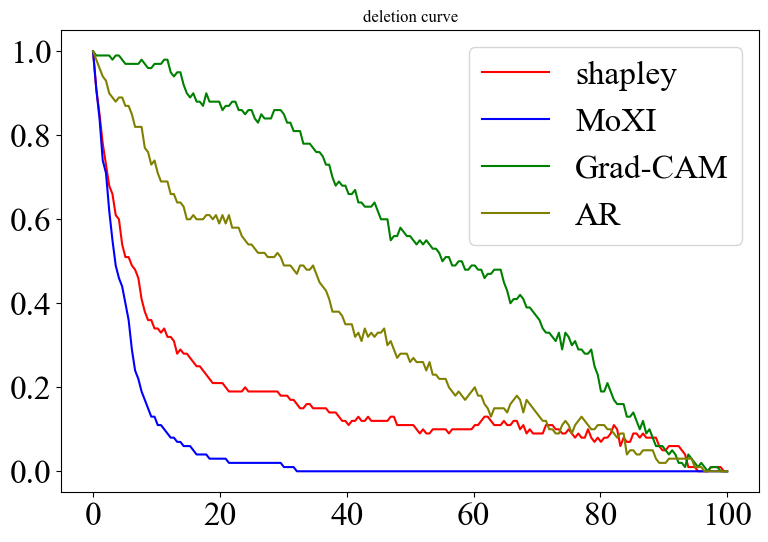

In [11]:
# set the plot config
curve_method = 'deletion'
identify_method_list = ['self-shapley', 'MoXI', 'gradcam', 'attention_rollout']

# plot the result
fig = plt.figure(figsize=(9, 6))
FONT = 24
x_axis = np.linspace(0, 100, args.grid_num**2+1)
plt.rcParams['font.family'] = 'Times New Roman'
for identify_method in identify_method_list:
    path = os.path.join(args.save_result_dir, f'online_identify/{args.dataset}_{args.dataset_sampling_number}/{args.model_name}/{curve_method}/{identify_method}/deletion_accuracy.npy')
    accuracy = np.load(path, allow_pickle=True)
    accuracy = np.insert(accuracy, 0, 1.0)
    label, color, marker = plot_config(identify_method)
    plt.plot(x_axis, accuracy, label=label, color=color)
plt.title(f'{curve_method} curve')
plt.xticks(fontsize=FONT)
plt.yticks(fontsize=FONT)
plt.legend(fontsize=FONT)